In [2]:
# import
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

In [3]:
# 데이터 가져오기
df = pd.read_csv('../Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
# 'RowNumber', 'CustomerId', 'Surname' 컬럼 drop
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# Age/ Tenure/ Balance/	NumOfProducts
- Age : this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure : refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance : also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts : refers to the number of products that a customer has purchased through the bank.

## Age
- Age : this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

In [6]:
# 나이 컬럼에서 최소값과 최대값 찾기
min_age = df['Age'].min()
max_age = df['Age'].max()

# 결과 출력
print("최소나이:", min_age)
print("최대나이:", max_age)

최소나이: 18
최대나이: 92


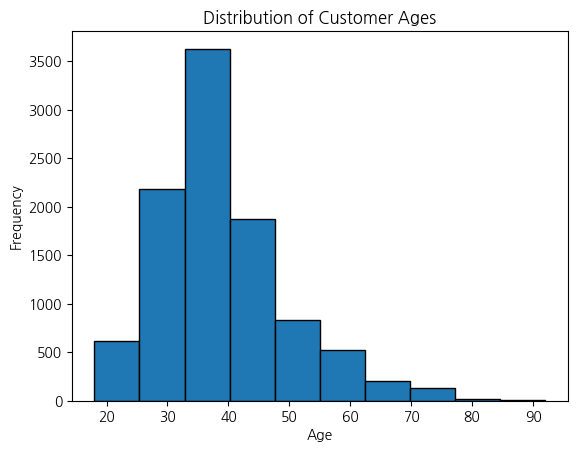

In [7]:
# 고객 나이분포 확인
import pandas as pd
import matplotlib.pyplot as plt

# 나이 분포 확인을 위한 히스토그램 생성
plt.hist(df['Age'], bins=10, edgecolor='k')

# 그래프 제목 및 축 레이블 설정
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


- 나이의 분포가 너무 집중되어있다.

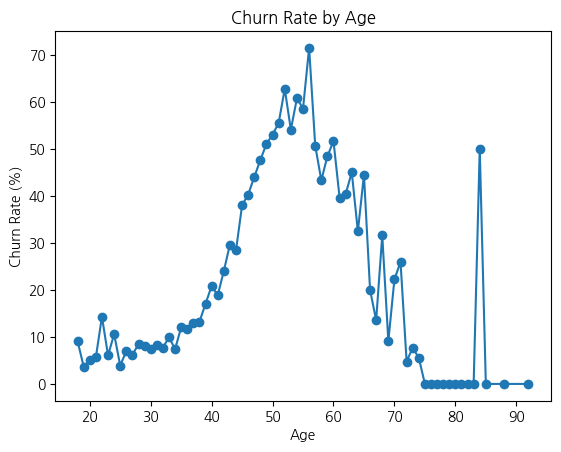

In [8]:
# 연령별 이탈 비율
age_churn_rate = df.groupby('Age')['Exited'].mean() * 100

plt.plot(age_churn_rate.index, age_churn_rate.values, marker='o')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate (%)')
plt.show()

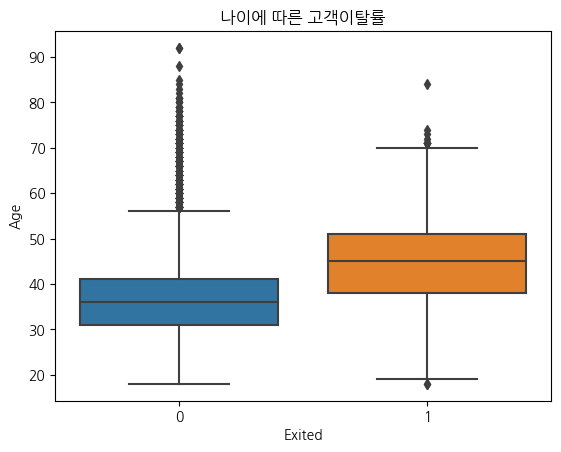

In [9]:
# 나이에 따른 고객이탈률을 boxplot으로 이상치 확인
import seaborn as sns

sns.boxplot(data=df, x='Exited', y='Age')
plt.title('나이에 따른 고객이탈률')
plt.show()


## Tenure(고객 기간)

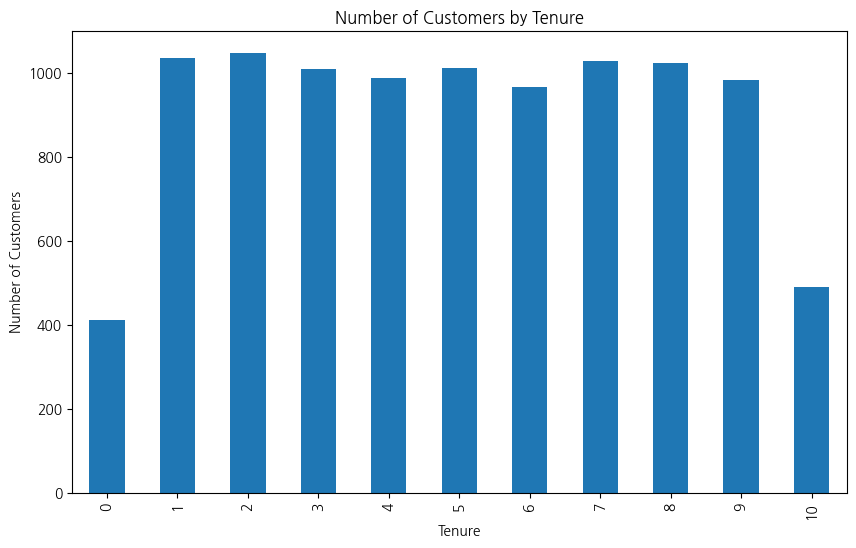

In [10]:
# 고객 기간별 고객 수 계산
tenure_counts = df['Tenure'].value_counts().sort_index()

tenure_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Customers by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()

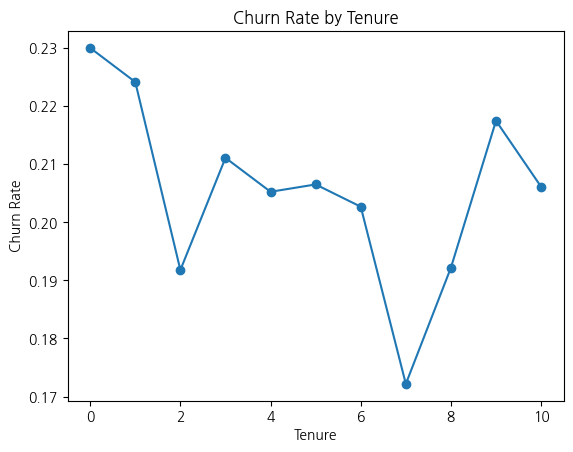

In [11]:
# 기간별 이탈 비율
tenure_exit_rates = df.groupby('Tenure')['Exited'].mean()

# 기간별 이탈 비율을 시각화
plt.plot(tenure_exit_rates.index, tenure_exit_rates.values, marker='o')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')
plt.show()

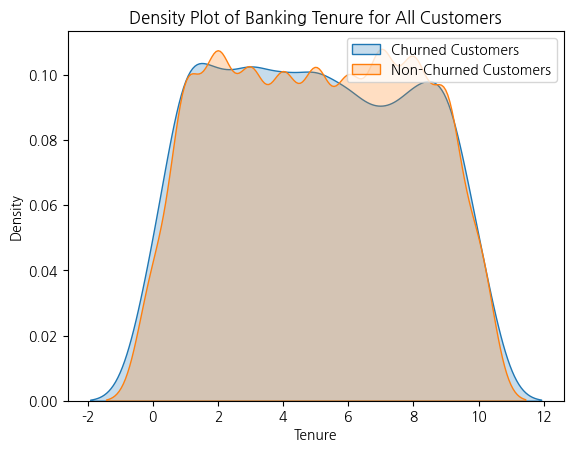

In [12]:
# 전체 고객들의 은행 이용 기간 밀도 그래프
churned_customers = df[df['Exited'] == 1]['Tenure']
non_churned_customers = df[df['Exited'] == 0]['Tenure']

sns.kdeplot(churned_customers, shade=True, label='Churned Customers')
sns.kdeplot(non_churned_customers, shade=True, label='Non-Churned Customers')

plt.title('Density Plot of Banking Tenure for All Customers')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()

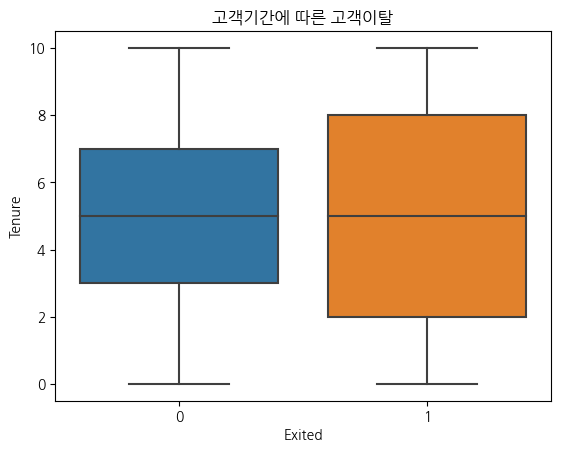

In [13]:
# 고객기간에 따른 고객이탈률을 boxplot으로 이상치 확인
import seaborn as sns

sns.boxplot(data=df, x='Exited', y='Tenure')
plt.title('고객기간에 따른 고객이탈')
plt.show()

## Balance

In [14]:
# 최소, 중간, 최고 잔액 계산
min_balance = df['Balance'].min()
median_balance = df['Balance'].median()
max_balance = df['Balance'].max()

print("Minimum Balance:", min_balance)
print("Median Balance:", median_balance)
print("Maximum Balance:", max_balance)

Minimum Balance: 0.0
Median Balance: 97198.54000000001
Maximum Balance: 250898.09


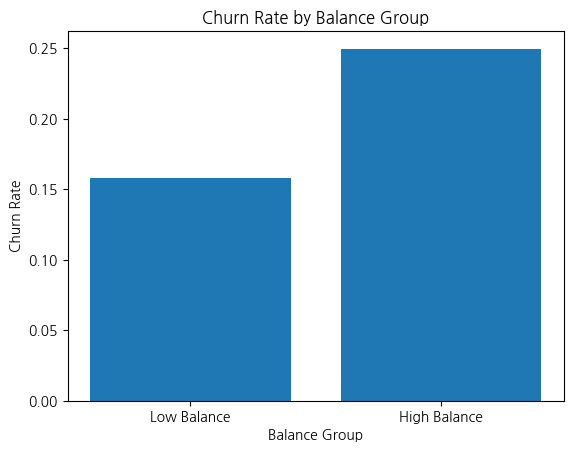

In [15]:
# 계좌 잔액 그룹화를 위한 기준값 설정
bins = [min_balance, median_balance, max_balance]
labels = ['Low Balance','High Balance']

df['BalanceGroup'] = pd.cut(df['Balance'], bins=bins, labels=labels, right=False)
balance_counts = df['BalanceGroup'].value_counts().sort_index()

balance_exit_rates = df.groupby('BalanceGroup')['Exited'].mean()

plt.bar(balance_exit_rates.index, balance_exit_rates.values)
plt.xlabel('Balance Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Balance Group')
plt.show()

## NumOfProducts

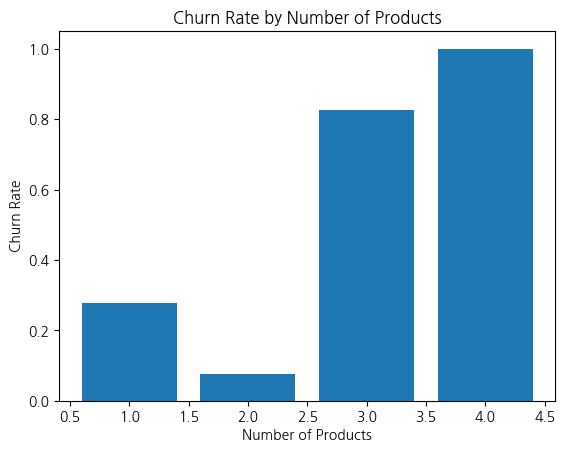

In [16]:
# 상품 수별 이탈 비율을 시각화

product_exit_rates = df.groupby('NumOfProducts')['Exited'].mean()

plt.bar(product_exit_rates.index, product_exit_rates.values)
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Products')
plt.show()


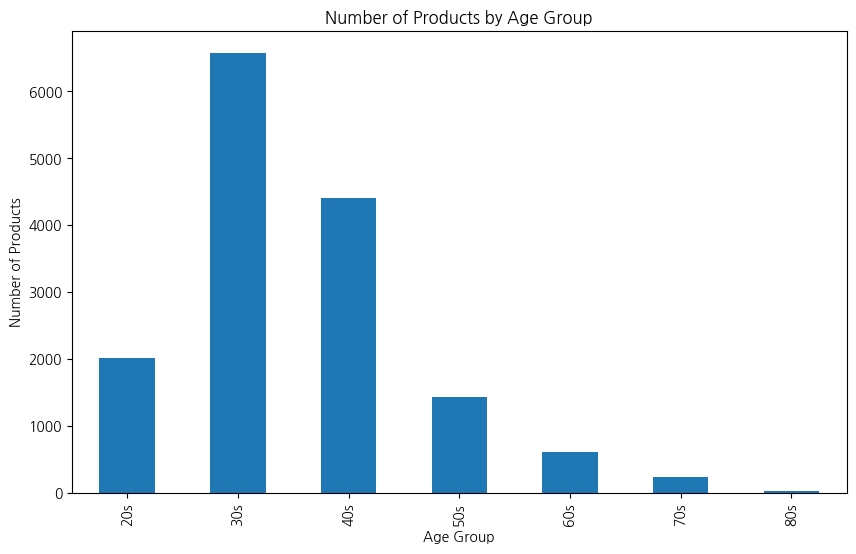

In [17]:
# 나이대별 상품 수 
age_bins = [18, 29, 39, 49, 59, 69, 79, 92]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

agegroup_product_counts = df.groupby('AgeGroup')['NumOfProducts'].sum()
agegroup_product_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Products')
plt.show()

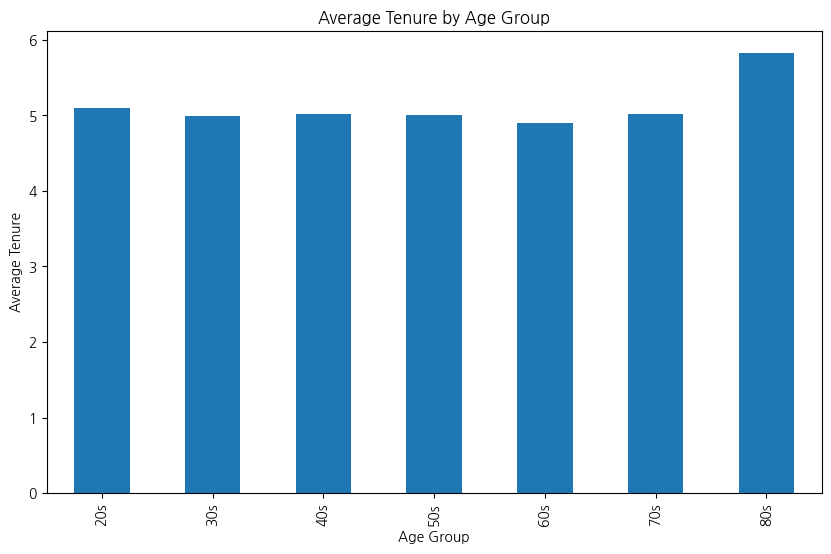

In [18]:
# 연령대별 고객 기간 계산
age_tenure = df.groupby('AgeGroup')['Tenure'].mean()

age_tenure.plot(kind='bar', figsize=(10, 6))

plt.title('Average Tenure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Tenure')
plt.show()

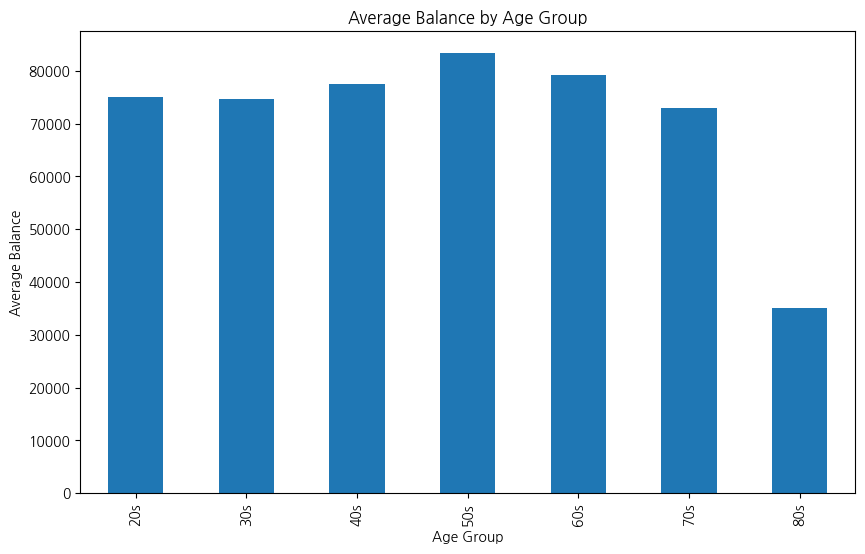

In [19]:
age_balance = df.groupby('AgeGroup')['Balance'].mean()
age_balance.plot(kind='bar', figsize=(10, 6))

plt.title('Average Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.show()
